## 1. Data Introduction


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
df=pd.read_csv('heart_2022_with_nans.csv')
display(df.head().T)

,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Female,Female,Female,Female
GeneralHealth,Very good,Excellent,Very good,Excellent,Fair
PhysicalHealthDays,0.0,0.0,2.0,0.0,2.0
MentalHealthDays,0.0,0.0,3.0,0.0,0.0
LastCheckupTime,Within past year (anytime less than 12 months ...,NaN,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,No,No,Yes,Yes,Yes
SleepHours,8.0,6.0,5.0,7.0,9.0
RemovedTeeth,NaN,NaN,NaN,NaN,NaN
HadHeartAttack,No,No,No,No,No


### Heart Attack Cases Distribution

/var/folders/b9/7r0bdvmx297_wzxt5g754xpm0000gn/T/ipykernel_7716/2182362294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HadHeartAttack', data=df, palette='Set2')


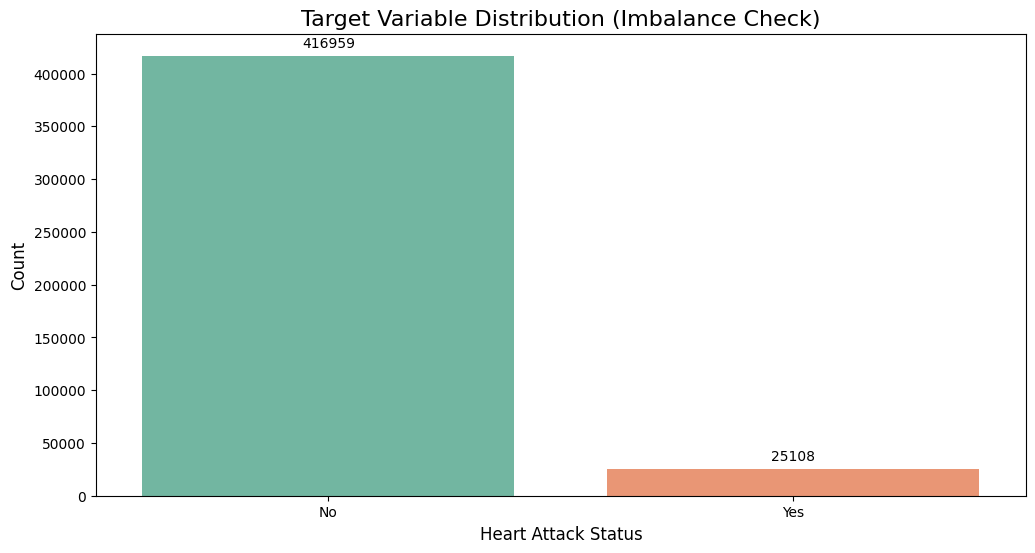

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='HadHeartAttack', data=df, palette='Set2')
plt.title('Target Variable Distribution (Imbalance Check)', fontsize=16)
plt.xlabel('Heart Attack Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

### BMI Research

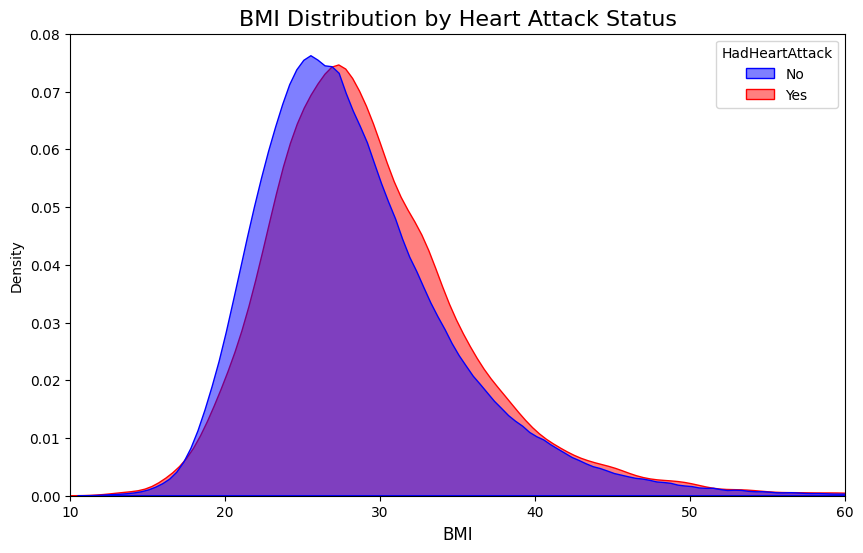

In [13]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='BMI', hue='HadHeartAttack', fill=True, 
            common_norm=False, palette=['blue', 'red'], alpha=0.5)

plt.title('BMI Distribution by Heart Attack Status', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.xlim(10, 60) 
plt.show()

### Body Healthy Condition

/var/folders/b9/7r0bdvmx297_wzxt5g754xpm0000gn/T/ipykernel_7716/4094951732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HadHeartAttack', y='PhysicalHealthDays', data=df, palette='pastel')


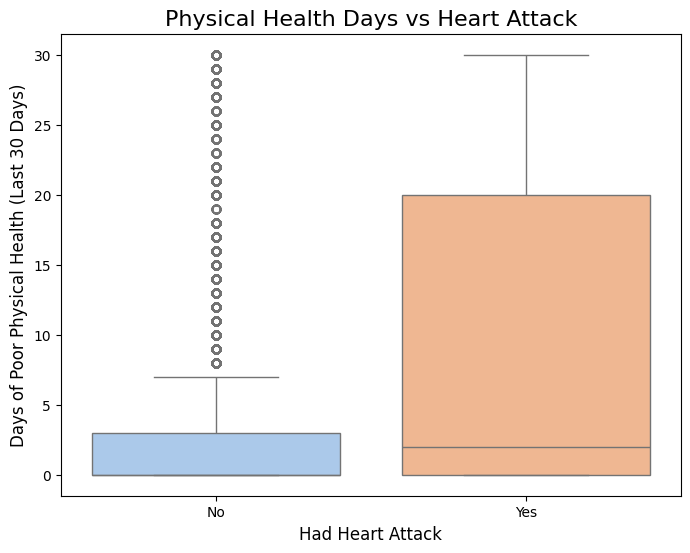

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HadHeartAttack', y='PhysicalHealthDays', data=df, palette='pastel')
plt.title('Physical Health Days vs Heart Attack', fontsize=16)
plt.xlabel('Had Heart Attack', fontsize=12)
plt.ylabel('Days of Poor Physical Health (Last 30 Days)', fontsize=12)
plt.show()

/var/folders/b9/7r0bdvmx297_wzxt5g754xpm0000gn/T/ipykernel_7716/593569550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


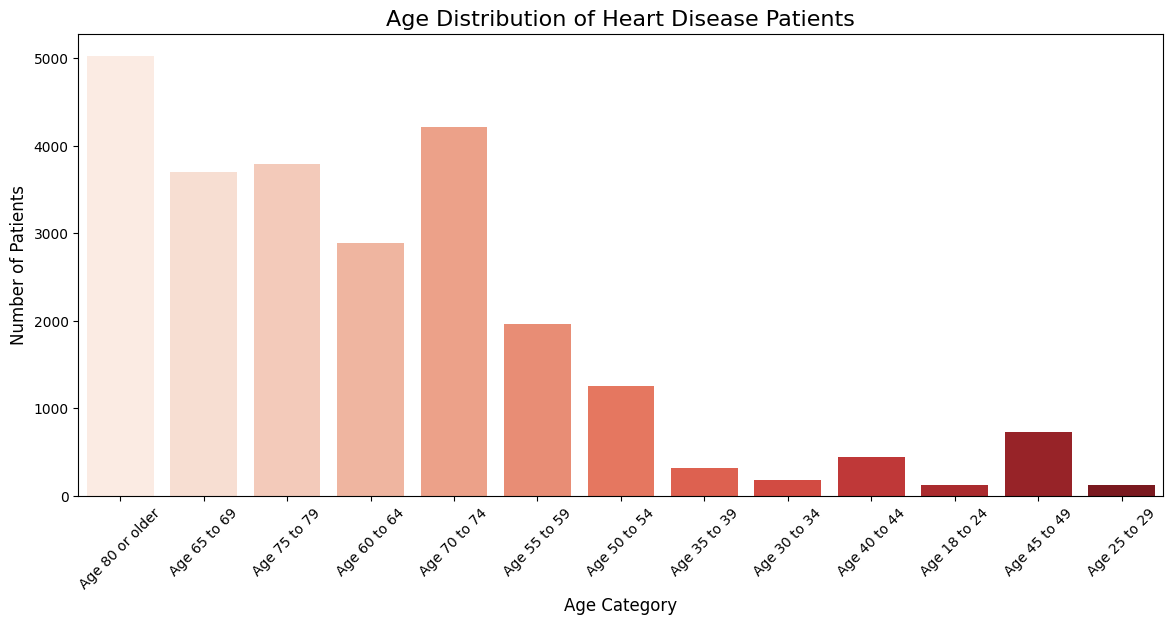

In [27]:
heart_patients = df[df['HadHeartAttack'] == 'Yes'] 

plt.figure(figsize=(14, 6))

sns.countplot(
    x='AgeCategory', 
    data=heart_patients, 
    palette='Reds'    
)

plt.title('Age Distribution of Heart Disease Patients', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45) 

plt.show()

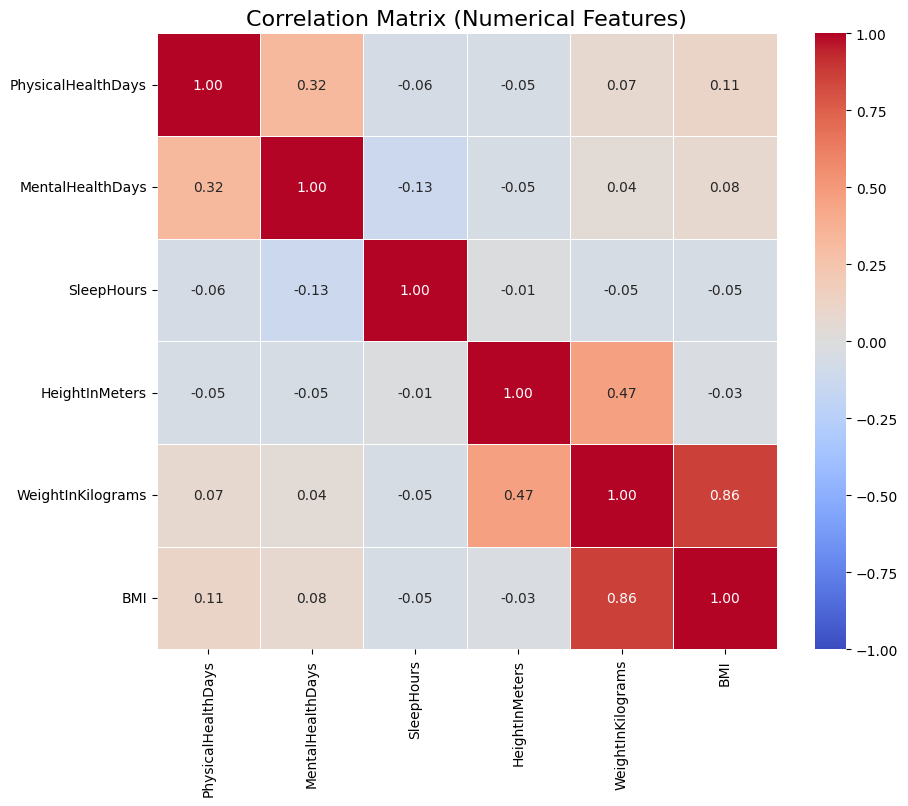

In [29]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Features)', fontsize=16)
plt.show()